# Лабораторная работа 5 - прогнозирование
## Вариант 3

In [255]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [256]:
from sklearn.linear_model import LinearRegression

## Подготовка данных

In [317]:
# x3 - Коэффициент загрузки гостиниц в процентах (Hotel Occupancy (in %))

df = pd.read_excel('Chicago_hotels.xlsx')
df.replace('',np.nan)
df.head()

,date1,date2,x1,x2,x3,x4
0,January,1994,44.3,104.04,51.9,72.15
1,February,1994,54.7,102.74,60.1,73.47
2,March,1994,61.9,105.23,65,74.91
3,April,1994,69.1,113.63,69.8,79.06
4,May,1994,70.8,120.77,72.4,82.07


In [318]:
df.tail(15)

,date1,date2,x1,x2,x3,x4
105,October,2002,77.1,173.08,67.7,120.35
106,November,2002,69.8,175.82,59.4,113.14
107,December,2002,54.8,148.95,46.6,99.1
108,January,2003,51.6,132.89,45.3,92.88
109,February,2003,52.7,127.44,50.8,90.99
110,March,2003,65,147.32,55.9,99.62
111,April,2003,69,150.72,58.4,101.32
112,May,2003,,,,
113,June,2003,,,,
114,July,2003,,,,


In [319]:
df = df.head(112) # оставим только заполненные строки

In [320]:
df.dtypes

date1    object
date2     int64
x1       object
x2       object
x3       object
x4       object
dtype: object

Приведём необходимый столбец к числовому типу

In [321]:
df['x3'] = df['x3'].astype('float64')

## График ряда

Text(0, 0.5, '%')

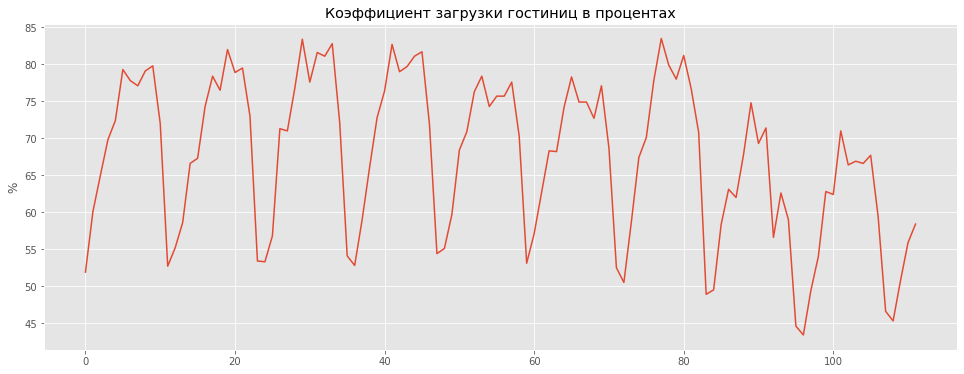

In [297]:
fig = plt.figure(figsize=(36, 6))
ax1 = fig.add_subplot(121)
df['x3'].plot(ax=ax1)
ax1.set_title(u'Коэффициент загрузки гостиниц в процентах')
ax1.set_ylabel(u'%')

1. Тренд

Первые три цикла имеют скорее стационарный характер, а далее наблюдается линейный тренд с отрицательным наклоном.

2. Сезонность - аддитивная


3. Смена характера ряда - наблюдается

Характер ряда меняется со стационарного на ряд с нисходящим трендом. Для прогнозирования будем использовать только второй фрагмент.

4. Явных выбросов - нет, но 7-ой цикл немного выбивается за счёт более высоких пиковых значений, а 8-ой - за счёт другой формы (большего количества пиков)

## Построение модели

Модель для прогнозирования (линейная регрессия): 
$$y_i = \alpha + \beta \cdot x_i + c(x_i) + \varepsilon_i,$$
где $y_i$ -- коэффициент загрузки гостиниц, $x_i$ -- порядковый номер месяца, $c(x_i)$ -- сезонная составляющая, $\varepsilon_i$ -- случайные отклонения.

Как было указано выше, для прогнозирования будем использовать только второй фрагмент ряда (с нисходящим трендом). Помимо этого необходимо учесть, что ряд оканчивается апрелем 2003 года. Значит, нужно рассматривать циклы не с января по декабрь, а с апреля по март.

In [322]:
# отбираем наблюдения с апреля 1997 по апрель 2003
df2 = df[39::]
df2.head()

,date1,date2,x1,x2,x3,x4
39,April,1997,76.6,137.85,72.8,97.95
40,May,1997,79.7,151.89,76.4,104.43
41,June,1997,86,153.25,82.7,106.87
42,July,1997,80.8,132.12,79.0,97.41
43,August,1997,82.4,141.69,79.7,101.38


In [323]:
df2['month_num'] = range(1, len(df2) + 1)
df2['y'] = df['x3']

<ipython-input-323-b8be7f9aade7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month_num'] = range(1, len(df2) + 1)
<ipython-input-323-b8be7f9aade7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y'] = df['x3']


In [324]:
#  удаляем ненужные переменные
df2 = df2.drop(columns=["date1","date2","x1","x2","x3","x4"])
df2.head()

,month_num,y
39,1,72.8
40,2,76.4
41,3,82.7
42,4,79.0
43,5,79.7


In [325]:
len(df2)

73

In [326]:
# дамми-переменные для месяцев
df2["m04"] = [1,0,0,0,0,0,0,0,0,0,0,0]*6 + [1]
df2["m05"] = [0,1,0,0,0,0,0,0,0,0,0,0]*6 + [0]
df2["m06"] = [0,0,1,0,0,0,0,0,0,0,0,0]*6 + [0]
df2["m07"] = [0,0,0,1,0,0,0,0,0,0,0,0]*6 + [0]
df2["m08"] = [0,0,0,0,1,0,0,0,0,0,0,0]*6 + [0]
df2["m09"] = [0,0,0,0,0,1,0,0,0,0,0,0]*6 + [0]
df2["m10"] = [0,0,0,0,0,0,1,0,0,0,0,0]*6 + [0]
df2["m11"] = [0,0,0,0,0,0,0,1,0,0,0,0]*6 + [0]
df2["m12"] = [0,0,0,0,0,0,0,0,1,0,0,0]*6 + [0]
df2["m01"] = [0,0,0,0,0,0,0,0,0,1,0,0]*6 + [0]
df2["m02"] = [0,0,0,0,0,0,0,0,0,0,1,0]*6 + [0]
df2["m03"] = [0,0,0,0,0,0,0,0,0,0,0,1]*6 + [0]

df2.head()

,month_num,y,m04,m05,m06,m07,m08,m09,m10,m11,m12,m01,m02,m03
39,1,72.8,1,0,0,0,0,0,0,0,0,0,0,0
40,2,76.4,0,1,0,0,0,0,0,0,0,0,0,0
41,3,82.7,0,0,1,0,0,0,0,0,0,0,0,0
42,4,79.0,0,0,0,1,0,0,0,0,0,0,0,0
43,5,79.7,0,0,0,0,1,0,0,0,0,0,0,0


In [327]:
#  столбец) откликов
y = df2['y']

In [328]:
#  матрица предикторов
# из матрицы удвляем столбец откликов и базовый месяц (возьмём в качестве него февраль)
X = df2.drop(columns=["y", "m02"])

In [329]:
#  подгонка модели
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [330]:
coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])

In [315]:
from scipy import stats

def regression_coef(model, X, y):
    coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef

In [331]:
regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,65.267177,0.000000e+00
1,month_num,-0.211395,0.000000e+00
2,m04,9.011565,1.616984e-05
3,m05,13.980782,1.747452e-09
4,m06,19.825510,7.327472e-15
5,m07,15.886905,3.004841e-11
6,m08,16.564966,6.976641e-12
7,m09,14.659694,3.884941e-10
8,m10,16.454422,8.537171e-12
9,m11,9.449150,1.342324e-05


На уровне $\alpha = 0.01$ гипотеза о равентсве нулю для каждого коэффициента отвергается => все коэффициенты значимы

<AxesSubplot:>

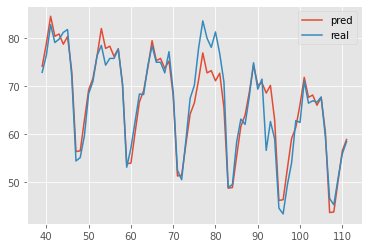

In [332]:
# сравним подгонку и исходный ряд
pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot()

## Прогнозирование

In [333]:
df3 = pd.DataFrame()

df3['month_num'] = range(74, 82)
df3.head()

,month_num
0,74
1,75
2,76
3,77
4,78


In [334]:
df3["m04"] = [1,0,0,0,0,0,0,0]
df3["m05"] = [0,1,0,0,0,0,0,0]
df3["m06"] = [0,0,1,0,0,0,0,0]
df3["m07"] = [0,0,0,1,0,0,0,0]
df3["m08"] = [0,0,0,0,1,0,0,0]
df3["m09"] = [0,0,0,0,0,1,0,0]
df3["m10"] = [0,0,0,0,0,0,1,0]
df3["m11"] = [0,0,0,0,0,0,0,1]
df3["m12"] = [0,0,0,0,0,0,0,0]
df3["m01"] = [0,0,0,0,0,0,0,0]
#df3["m02"] = [0,0,0,0,0,0,0,0]
df3["m03"] = [0,0,0,0,0,0,0,0]

df3.head()

,month_num,m04,m05,m06,m07,m08,m09,m10,m11,m12,m01,m03
0,74,1,0,0,0,0,0,0,0,0,0,0
1,75,0,1,0,0,0,0,0,0,0,0,0
2,76,0,0,1,0,0,0,0,0,0,0,0
3,77,0,0,0,1,0,0,0,0,0,0,0
4,78,0,0,0,0,1,0,0,0,0,0,0


In [337]:
model.predict(df3)

array([58.63554422, 63.39336735, 69.02670068, 64.87670068, 65.34336735,
       63.22670068, 64.81003401, 57.59336735])

In [338]:
pred['forecast'] = np.nan
pred.head()

,pred,real,forecast
39,74.067347,72.8,NaN
40,78.825170,76.4,NaN
41,84.458503,82.7,NaN
42,80.308503,79.0,NaN
43,80.775170,79.7,NaN


In [339]:
pred2 = pd.DataFrame(model.predict(df3), columns=['forecast'])
pred2['real'] = np.nan
pred2['pred'] = np.nan

pred2.head()

,forecast,real,pred
0,58.635544,NaN,NaN
1,63.393367,NaN,NaN
2,69.026701,NaN,NaN
3,64.876701,NaN,NaN
4,65.343367,NaN,NaN


<AxesSubplot:>

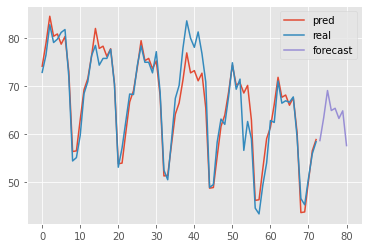

In [340]:
pred3 = pd.concat(
    [pred, pred2],
    sort=False
).reset_index(drop=True)

pred3.plot()

На совместном графике построенный прогноз выглядит разумно, стыкуется с исходными данными.